DATA COLLECTION AND PREPROCESSING

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations

# oneAPI setup and necessary imports
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearnex.cluster import KMeans  # for clustering later if required


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
# Load EV charging station datasets
germany_data = pd.read_csv('charging_data.csv')
usa_data = pd.read_csv('Electric_Vehicle_Charging_Stations.csv')

# Load Customer Demand datasets
traffic_nyc_data = pd.read_csv('Automated_Traffic_Volume_Counts.csv')

In [10]:
# Check the first few rows to understand the structure of the datasets
print("Traffic NYC Dataset: ")
print(traffic_nyc_data.head())  # First 5 rows of the dataset
print("\nCharging Data: ")
print(germany_data.head())
print("\nEV Stations v1 Dataset: ")
print(usa_data.head())

Traffic NYC Dataset: 
   RequestID           Boro    Yr   M   D  HH  MM  Vol  SegmentID   
0      20856         Queens  2015   6  23  23  30    9     171896  \
1      21231  Staten Island  2015   9  14   4  15    6       9896   
2      29279          Bronx  2017  10  19   4  30   85      77817   
3      27019       Brooklyn  2017  11   7  18  30  168     188023   
4      26734      Manhattan  2017  11   3  22   0  355     137516   

                                         WktGeom              street   
0   POINT (1052296.600156678 199785.26932711253)           94 AVENUE  \
1      POINT (942668.0589509147 171441.21296926)    RICHMOND TERRACE   
2  POINT (1016508.0034050211 235221.59092266942)  HUNTS POINT AVENUE   
3   POINT (992925.4316054962 184116.82855457635)     FLATBUSH AVENUE   
4  POINT (1004175.9505178436 247779.63624949602)   WASHINGTON BRIDGE   

                   fromSt                     toSt Direction  
0              207 Street  Francis Lewis Boulevard        WB  
1   

In [11]:
print("\nChecking for missing data in NYC Traffic dataset:")
print(traffic_nyc_data.isnull().sum())  # Count the missing values for each column

print("\nChecking for missing data in Charging data:")
print(germany_data.isnull().sum())

print("\nChecking for missing data in EV Stations dataset:")
print(usa_data.isnull().sum())


Checking for missing data in NYC Traffic dataset:
RequestID       0
Boro            0
Yr              0
M               0
D               0
HH              0
MM              0
Vol             0
SegmentID       0
WktGeom         0
street          0
fromSt          0
toSt         2002
Direction       0
dtype: int64

Checking for missing data in Charging data:
Unnamed: 0                    0
betreiber                     0
art_der_ladeeinrichung        0
anzahl_ladepunkte             0
anschlussleistung             0
steckertypen1                 0
steckertypen2              5659
steckertypen3             34537
steckertypen4             35638
p1_kw                         0
p2_kw                      5641
p3_kw                     34537
p4_kw                     35639
kreis_kreisfreie_stadt        0
ort                           0
postleitzahl                  0
strasse                       0
hausnummer                    0
adresszusatz              32147
inbetriebnahmedatum           0

In [13]:
# Filling missing values with the mean for numeric columns
# Function to safely apply imputation if numeric columns exist
def impute_numeric_data(df):
    numeric_cols = df.select_dtypes(include=np.number)
    if numeric_cols.shape[1] > 0:  # Check if there are numeric columns
        imputer = SimpleImputer(strategy='mean')
        imputed_data = imputer.fit_transform(numeric_cols)
        # Convert imputed numpy array back to DataFrame
        return pd.DataFrame(imputed_data, columns=numeric_cols.columns)
    else:
        # If no numeric columns, return the original DataFrame without changes
        return numeric_cols

# Apply imputation only to numeric columns
traffic_nyc_data_imputed = impute_numeric_data(traffic_nyc_data)
germany_data_imputed = impute_numeric_data(germany_data)
usa_data_imputed = impute_numeric_data(usa_data)

# Combine imputed numeric data with non-numeric columns
traffic_nyc_data_clean = pd.concat([pd.DataFrame(traffic_nyc_data_imputed), traffic_nyc_data.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)
germany_data_clean = pd.concat([pd.DataFrame(germany_data_imputed), germany_data.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)
usa_data_clean = pd.concat([pd.DataFrame(usa_data_imputed), usa_data.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)


In [15]:
# Scaling the numeric data for better performance in algorithms
# Function to safely apply scaling if numeric columns exist
def scale_numeric_data(df):
    numeric_cols = df.select_dtypes(include=np.number)
    if numeric_cols.shape[1] > 0:  # Check if there are numeric columns
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numeric_cols)
        # Convert scaled numpy array back to DataFrame
        return pd.DataFrame(scaled_data, columns=numeric_cols.columns)
    else:
        # If no numeric columns, return the original DataFrame without changes
        return numeric_cols

# Apply scaling only to numeric columns
traffic_nyc_data_scaled = scale_numeric_data(traffic_nyc_data_clean)
germany_data_scaled = scale_numeric_data(germany_data_clean)
usa_data_scaled = scale_numeric_data(usa_data_clean)

# Combine scaled numeric data with non-numeric columns
traffic_nyc_dataclean = pd.concat([pd.DataFrame(traffic_nyc_data_scaled), traffic_nyc_data_clean.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)
germany_data_clean = pd.concat([pd.DataFrame(germany_data_scaled), germany_data_clean.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)
usa_data_clean = pd.concat([pd.DataFrame(usa_data_scaled), usa_data_clean.select_dtypes(exclude=np.number).reset_index(drop=True)], axis=1)

In [17]:
traffic_nyc_data_clean = traffic_nyc_data_clean.drop_duplicates()
germany_data_clean = germany_data_clean.drop_duplicates()
usa_data_clean = usa_data_clean.drop_duplicates()


In [18]:
print("\nColumn names and data types for Traffic NYC dataset:")
print(traffic_nyc_data_clean.info())  # Provides information about the columns and their data types

print("\nColumn names and data types for Charging Data dataset:")
print(germany_data_clean.info())

print("\nColumn names and data types for EV Stations v1 dataset:")
print(usa_data_clean.info())



Column names and data types for Traffic NYC dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 26874241 entries, 0 to 27190510
Data columns (total 14 columns):
 #   Column     Dtype  
---  ------     -----  
 0   RequestID  float64
 1   Yr         float64
 2   M          float64
 3   D          float64
 4   HH         float64
 5   MM         float64
 6   Vol        float64
 7   SegmentID  float64
 8   Boro       object 
 9   WktGeom    object 
 10  street     object 
 11  fromSt     object 
 12  toSt       object 
 13  Direction  object 
dtypes: float64(8), object(6)
memory usage: 3.0+ GB
None

Column names and data types for Charging Data dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  float64
 1   anzahl_ladepunkte       36770 non-null  float64
 2   anschlussleis

In [21]:
traffic_nyc_data_clean.to_csv('cleaned_datasets_INTEL/cleaned_traffic_nyc_data.csv', index=False)
germany_data_clean.to_csv('cleaned_datasets_INTEL/cleaned_germany_data.csv', index=False)
usa_data_clean.to_csv('cleaned_datasets_INTEL/cleaned_usa_data.csv', index=False)

DATA ANALYSIS

In [4]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations
import geopandas as gpd  # For geospatial analysis (mapping coordinates)
from sklearnex.cluster import KMeans  # oneDAL optimized KMeans
from sklearnex.decomposition import PCA  # oneDAL optimized PCA

In [5]:
#2. Load the relevant datasets (cleaned datasets from Step 1)
ev_germany = pd.read_csv('cleaned_datasets_INTEL/cleaned_germany_data.csv')
ev_usa = pd.read_csv('cleaned_datasets_INTEL/cleaned_usa_data.csv')
traffic_nyc = pd.read_csv('cleaned_datasets_INTEL/cleaned_traffic_nyc_data.csv')

In [6]:
# Group NYC traffic data by location (SegmentID) and calculate total traffic volume per location
traffic_by_location = traffic_nyc.groupby('SegmentID')['Vol'].sum().reset_index()
traffic_by_location = traffic_by_location.sort_values(by='Vol', ascending=False)

In [7]:
# Applying KMeans clustering to find high-traffic clusters
kmeans_algo = KMeans(n_clusters=3, random_state=0, max_iter=300)  # Intel oneDAL optimized KMeans
traffic_by_location['Cluster'] = kmeans_algo.fit_predict(traffic_by_location[['Vol']])

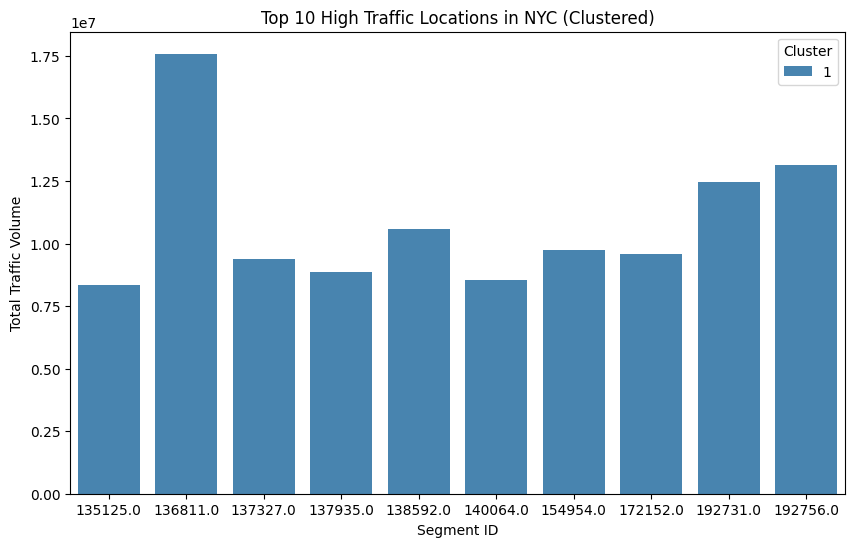

In [8]:
# Visualizing Clusters (Top 10 high-traffic locations with their cluster groupings)
plt.figure(figsize=(10,6))
sns.barplot(x=traffic_by_location['SegmentID'].head(10), y=traffic_by_location['Vol'].head(10), hue=traffic_by_location['Cluster'].head(10), palette="Blues_d")
plt.title('Top 10 High Traffic Locations in NYC (Clustered)')
plt.xlabel('Segment ID')
plt.ylabel('Total Traffic Volume')
plt.show()

/home/u08d73873001a620a84bf629071ef7b7/.local/lib/python3.10/site-packages/geopandas/plotting.py:968: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  return plot_dataframe(data, *args, **kwargs)


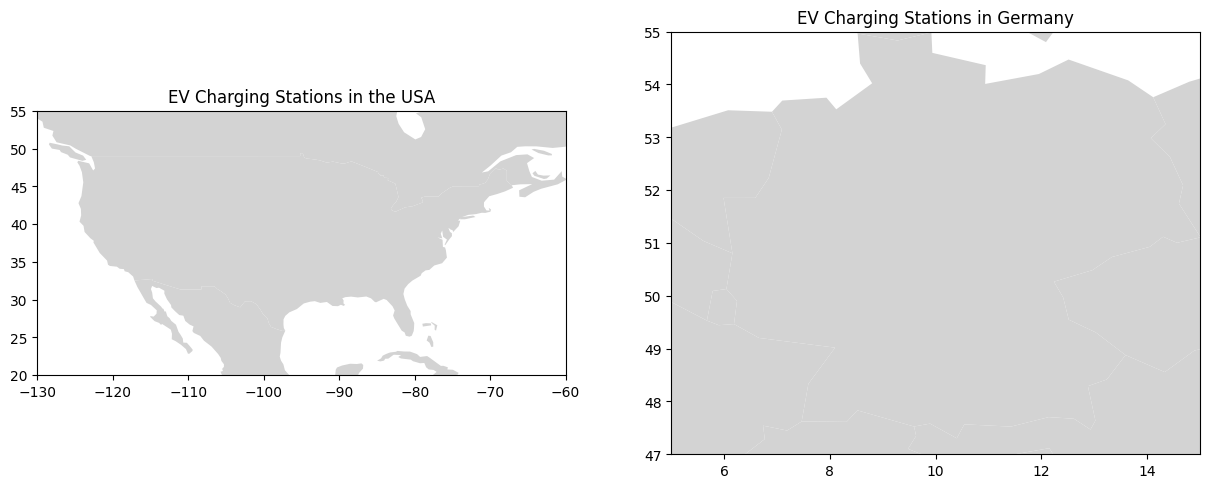

In [32]:
# Fix the error in 'Georeferences' (USA dataset) to properly extract latitude and longitude
ev_usa[['latitude', 'longitude']] = ev_usa['New Georeferenced Column'].str.extract(r'\(([^,]+), ([^\)]+)\)')  # Fixed regex
ev_usa['latitude'] = pd.to_numeric(ev_usa['latitude'])
ev_usa['longitude'] = pd.to_numeric(ev_usa['longitude'])

# Germany dataset already has proper longitude/latitude columns, validate and clean if needed
ev_germany['breitengrad'] = pd.to_numeric(ev_germany['breitengrad'], errors='coerce')
ev_germany['laengengrad'] = pd.to_numeric(ev_germany['laengengrad'], errors='coerce')
ev_germany = ev_germany.dropna(subset=['breitengrad', 'laengengrad'])  # Drop rows with missing coordinates

# Create a GeoDataFrame for the EV charging stations in USA and Germany
gdf_usa = gpd.GeoDataFrame(ev_usa, geometry=gpd.points_from_xy(ev_usa['longitude'], ev_usa['latitude']))
gdf_germany = gpd.GeoDataFrame(ev_germany, geometry=gpd.points_from_xy(ev_germany['laengengrad'], ev_germany['breitengrad']))

world = gpd.read_file('ne_110m_admin_0_countries.shp')  # World basemap

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot USA (Fix: Ensure that markers for USA are properly plotted)
world.plot(ax=ax[0], color='lightgray')
gdf_usa.plot(ax=ax[0], color='blue', markersize=5, label='USA EV Stations')
ax[0].set_xlim([-130, -60])  # Limit to USA region for proper display
ax[0].set_ylim([20, 55])
ax[0].set_title('EV Charging Stations in the USA')

# Plot Germany (Fix: Ensure correct coordinates and limit the view)
world.plot(ax=ax[1], color='lightgray')
gdf_germany.plot(ax=ax[1], color='red', markersize=5, label='Germany EV Stations')
ax[1].set_xlim([5, 15])  # Limit to Germany region
ax[1].set_ylim([47, 55])
ax[1].set_title('EV Charging Stations in Germany')

plt.show()

/tmp/ipykernel_259371/2450055647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_demand_locations['SegmentID'].head(10), y=high_demand_locations['Vol'].head(10), palette="Oranges_d")


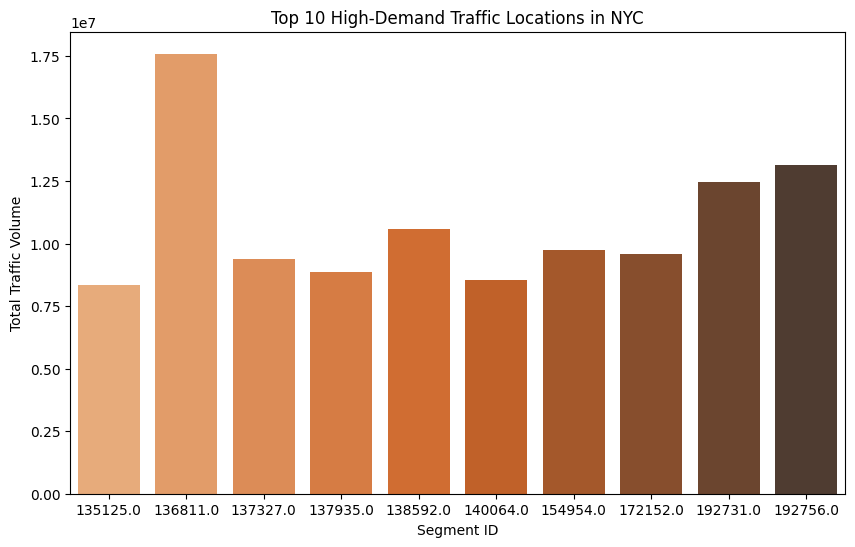

In [33]:
# Assume traffic locations with more than 100,000 volume are high-demand areas
high_demand_locations = traffic_by_location[traffic_by_location['Vol'] > 100000]

# Visualize high-demand areas for easier understanding
plt.figure(figsize=(10,6))
sns.barplot(x=high_demand_locations['SegmentID'].head(10), y=high_demand_locations['Vol'].head(10), palette="Oranges_d")
plt.title('Top 10 High-Demand Traffic Locations in NYC')
plt.xlabel('Segment ID')
plt.ylabel('Total Traffic Volume')
plt.show()

TRAIN THE MODEL

In [1]:
# Step 1: Apply Intel optimizations (oneDAL)
from sklearnex import patch_sklearn
patch_sklearn()  # Enable optimizations for sklearn models

# Step 2: Load necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearnex.linear_model import LinearRegression
from sklearnex.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
traffic_data = pd.read_csv('cleaned_datasets_INTEL/cleaned_traffic_nyc_data.csv')
charging_data = pd.read_csv('cleaned_datasets_INTEL/cleaned_usa_data.csv')

print(charging_data.info())  # Check if rows are being read correctly
print(charging_data.head())  # View the top rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
                          Station Name          Street Address          City   
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien  \
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beaco

In [47]:
print(traffic_data.head())

   RequestID      Yr     M     D    HH    MM    Vol  SegmentID           Boro   
0    20856.0  2015.0   6.0  23.0  23.0  30.0    9.0   171896.0         Queens  \
1    21231.0  2015.0   9.0  14.0   4.0  15.0    6.0     9896.0  Staten Island   
2    29279.0  2017.0  10.0  19.0   4.0  30.0   85.0    77817.0          Bronx   
3    27019.0  2017.0  11.0   7.0  18.0  30.0  168.0   188023.0       Brooklyn   
4    26734.0  2017.0  11.0   3.0  22.0   0.0  355.0   137516.0      Manhattan   

                                         WktGeom              street   
0   POINT (1052296.600156678 199785.26932711253)           94 AVENUE  \
1      POINT (942668.0589509147 171441.21296926)    RICHMOND TERRACE   
2  POINT (1016508.0034050211 235221.59092266942)  HUNTS POINT AVENUE   
3   POINT (992925.4316054962 184116.82855457635)     FLATBUSH AVENUE   
4  POINT (1004175.9505178436 247779.63624949602)   WASHINGTON BRIDGE   

                   fromSt                     toSt Direction  
0              20

In [3]:
import re

# Function to extract coordinates with improved debugging
def extract_geo_coordinates(geo_column):
    # Ensure that we're handling non-null values
    if isinstance(geo_column, str) and geo_column.startswith("POINT"):
        match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', geo_column)
        if match:
            lon, lat = match.groups()
            return float(lat), float(lon)
        else:
            print(f"No match found for: {geo_column}")  # Print when match fails
    else:
        print(f"Invalid or missing data: {geo_column}")  # Print when data is invalid or null
    return None, None

# Apply the function and debug any problematic rows
charging_data['Latitude'], charging_data['Longitude'] = zip(*charging_data['New Georeferenced Column'].apply(extract_geo_coordinates))

# Check if the coordinates were extracted correctly
print(charging_data[['New Georeferenced Column', 'Latitude', 'Longitude']].head())

# Drop rows where coordinates could not be extracted
charging_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Check how many rows remain after extraction
print(f"Remaining rows after extraction: {len(charging_data)}")


               New Georeferenced Column   Latitude  Longitude
0         POINT (-73.4764687 41.072882)  41.072882 -73.476469
1          POINT (-72.773473 41.527367)  41.527367 -72.773473
2  POINT (-73.065583 41.44548100000001)  41.445481 -73.065583
3           POINT (-72.3825 41.3102778)  41.310278 -72.382500
4          POINT (-73.264511 41.143125)  41.143125 -73.264511
Remaining rows after extraction: 385


In [70]:
print(traffic_data.head())

   RequestID      Yr     M     D    HH    MM    Vol  SegmentID           Boro   
0    20856.0  2015.0   6.0  23.0  23.0  30.0    9.0   171896.0         Queens  \
1    21231.0  2015.0   9.0  14.0   4.0  15.0    6.0     9896.0  Staten Island   
2    29279.0  2017.0  10.0  19.0   4.0  30.0   85.0    77817.0          Bronx   
3    27019.0  2017.0  11.0   7.0  18.0  30.0  168.0   188023.0       Brooklyn   
4    26734.0  2017.0  11.0   3.0  22.0   0.0  355.0   137516.0      Manhattan   

                                        WktGeom              street   
0   POINT (1052296.600156678 199785.26932711253           94 AVENUE  \
1      POINT (942668.0589509147 171441.21296926    RICHMOND TERRACE   
2  POINT (1016508.0034050211 235221.59092266942  HUNTS POINT AVENUE   
3   POINT (992925.4316054962 184116.82855457635     FLATBUSH AVENUE   
4  POINT (1004175.9505178436 247779.63624949602   WASHINGTON BRIDGE   

                   fromSt                     toSt Direction  
0              207 Stre

In [65]:
print(traffic_data['WktGeom'].unique())

['POINT (1052296.600156678 199785.26932711253)'
 'POINT (942668.0589509147 171441.21296926)'
 'POINT (1016508.0034050211 235221.59092266942)' ...
 'POINT (1004380.2714909095 238618.42190746102)'
 'POINT (963533.4360886444 171080.38533819612)' 'POINT (992024 192916.9)']


In [4]:
# Clean the 'WktGeom' column by removing 'POINT(' and ')'
traffic_data['WktGeom'] = traffic_data['WktGeom'].str.replace('POINT\(', '').str.replace('\)', '')

# Split the WktGeom column into Easting and Northing
traffic_data[['Easting', 'Northing']] = traffic_data['WktGeom'].str.split(expand=True)

# Convert the columns to float type
traffic_data['Easting'] = traffic_data['Easting'].astype(float)
traffic_data['Northing'] = traffic_data['Northing'].astype(float)

print(traffic_data[['Easting', 'Northing']].head())  # Check the output


ValueError: Columns must be same length as key

In [ ]:
from pyproj import Transformer

# Define the transformer for EPSG:2263 (NAD83 / New York Long Island) to WGS84
transformer = Transformer.from_crs("epsg:2263", "epsg:4326")

# Convert the easting and northing columns to latitude and longitude
traffic_data['Latitude'], traffic_data['Longitude'] = transformer.transform(traffic_data['Easting'].values, traffic_data['Northing'].values)

# Verify the conversion result
print(traffic_data[['Latitude', 'Longitude']].head())  # Check the conversion output


In [15]:
# Group by latitude, longitude, and street
traffic_grouped = traffic_data.groupby(['latitude', 'longitude', 'street']).agg({'Vol': 'sum'}).reset_index()

print(traffic_grouped.head())

        latitude      longitude         street       Vol
0  120795.604849  914887.641452  BILLOP AVENUE   42602.0
1  120797.719822  914896.547396  BILLOP AVENUE  153045.0
2  120797.763214  914896.730117  BILLOP AVENUE  185596.0
3  120799.327508  914903.317206  BILLOP AVENUE  153045.0
4  120804.229625  914923.959546  BILLOP AVENUE  112457.0


In [48]:
charging_grouped = charging_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='num_stations')

In [49]:
print(charging_grouped.head())

    Latitude  Longitude  num_stations
0  41.015276 -73.634045             1
1  41.016928 -73.647607             1
2  41.017757 -73.623525             1
3  41.040555 -73.673445             1
4  41.040838 -73.540539             1


In [ ]:
data_merged = pd.merge(traffic_grouped, charging_grouped, left_on=['pickup_latitude', 'pickup_longitude'],
                       right_on=['Latitude', 'Longitude'], how='left')
data_merged['num_stations'] = data_merged['num_stations'].fillna(0)

In [ ]:
X = data_merged[['Vol', 'num_stations']]  # Features: Traffic volume and number of stations
y = data_merged['num_stations']           # Target: Number of charging stations

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearnex.linear_model import LinearRegression
lr_algo = LinearRegression().fit(data, labels)
coef, intercept = lr_algo.coef_, lr_algo.intercept_

In [ ]:
from sklearnex.cluster import KMeans
kmeans_algo = KMeans(n_clusters=2, max_iter=10).fit(data)
centroids = kmeans_algo.cluster_centers_

In [ ]:
plt.scatter(data_merged['pickup_longitude'], data_merged['pickup_latitude'], c=data_merged['cluster'], cmap='viridis')
plt.title('Intel-Optimized K-means Clustering of Traffic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
high_demand_areas = data_merged[(data_merged['Vol'] > 100000) & (data_merged['num_stations'] == 0)]
print(high_demand_areas[['pickup_latitude', 'pickup_longitude', 'Vol']])